In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

data = pd.read_csv("Mall_Customers.csv")


In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)


In [15]:
linkage_matrix = linkage(scaled_features, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')


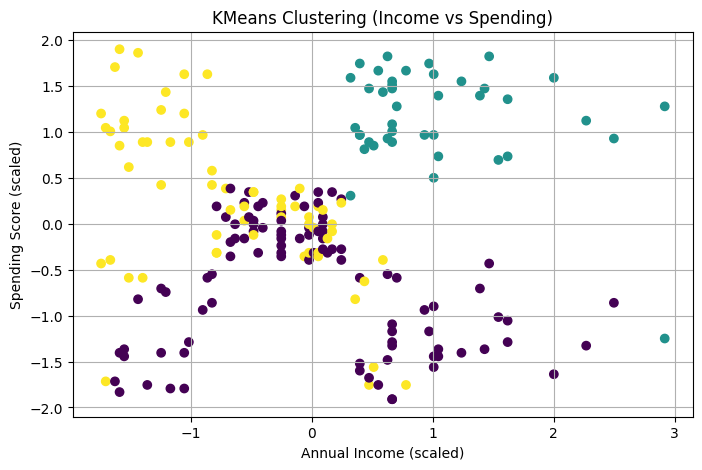

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(scaled_features[:, 1], scaled_features[:, 2], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering (Income vs Spending)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()


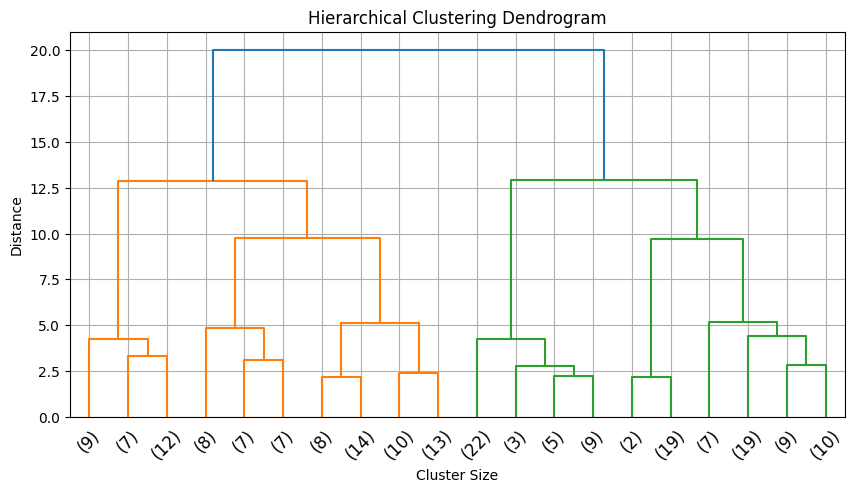

In [17]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


In [18]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
hier_silhouette = silhouette_score(scaled_features, hierarchical_labels)

print("KMeans Silhouette Score:", round(kmeans_silhouette, 3))
print("Hierarchical Silhouette Score:", round(hier_silhouette, 3))


KMeans Silhouette Score: 0.358
Hierarchical Silhouette Score: 0.321


In [19]:
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels

print("KMeans Cluster Profiles:\n")
kmeans_profiles = data.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(kmeans_profiles)

print("\nHierarchical Cluster Profiles:\n")
hierarchical_profiles = data.groupby('Hierarchical_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(hierarchical_profiles)


KMeans Cluster Profiles:

                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               50.406250           60.468750               33.343750
1               32.853659           87.341463               79.975610
2               25.142857           43.269841               56.507937

Hierarchical Cluster Profiles:

                            Age  Annual Income (k$)  Spending Score (1-100)
Hierarchical_Cluster                                                       
1                     49.915789           59.063158               32.515789
2                     32.692308           86.538462               82.128205
3                     26.560606           47.363636               56.787879
